## Linear Regression Project Tutorial

#### Predicting the medical insurance cost of a person

**Importar librerías y cargar dataframe**

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [127]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'

df = pd.read_csv(url)

**Ver las variables y una muestra de su contenido**

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*Columns*

- *age:* age of primary beneficiary
- *sex:* insurance contractor gender, female or male
- *bmi:* Body mass index
- *children:* Number of children covered by health insurance / Number of dependents
- *smoker:* Smoking
- *region:* the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- *charges:* Individual medical costs billed by health insurance

In [129]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
287,63,female,26.220,0,no,northwest,14256.19280
568,49,female,31.900,5,no,southwest,11552.90400
1008,25,male,24.985,2,no,northeast,23241.47453
972,22,female,20.235,0,no,northwest,2527.81865
1286,28,female,17.290,0,no,northeast,3732.62510
338,50,male,32.300,1,yes,northeast,41919.09700
1208,37,female,25.555,1,yes,northeast,20296.86345
223,19,male,34.800,0,yes,southwest,34779.61500
979,36,female,29.920,0,no,southeast,4889.03680
357,47,male,29.830,3,no,northwest,9620.33070


In [130]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Codificar las variables categóricas utilizando valores numéricos**

In [131]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [132]:
sex_dict = {'male':1, 'female':0}
df['sex'] = df['sex'].map(sex_dict)

In [133]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [134]:
smoker_dict = {'yes':1, 'no':0}
df['smoker'] = df['smoker'].map(smoker_dict)

In [135]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [136]:
region_dict = {'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3}
df['region'] = df['region'].map(region_dict)

**Separar el dataframe en train y test**

In [137]:
X = df.drop(columns=['charges'])
y = df['charges']

In [138]:
X_train, X_test_aux, y_train, y_test_aux = train_test_split(X, y, test_size=0.3, random_state=19)

**EDA sobre el dataframe de entrenamiento**

In [139]:
df_train = pd.concat([X_train, y_train], axis=1)

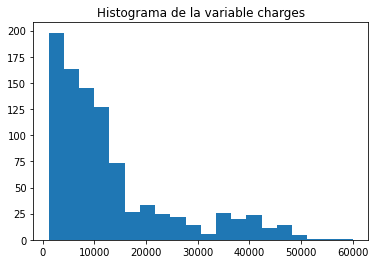

In [140]:
plt.hist(df_train['charges'], bins=20)
plt.title('Histograma de la variable charges')
plt.show()

In [141]:
fig = px.box(df_train, x='charges', title='Boxplot de la variable charges')
fig.show()

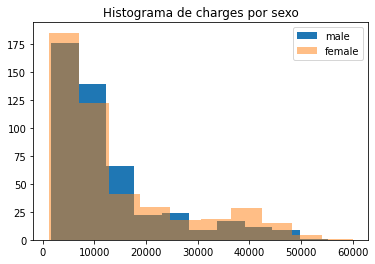

In [142]:
plt.hist(df_train[df_train['sex']==0]['charges'], label='male')
plt.hist(df_train[df_train['sex']==1]['charges'], label='female', alpha=0.5)
plt.title('Histograma de charges por sexo')
plt.legend()
plt.show()

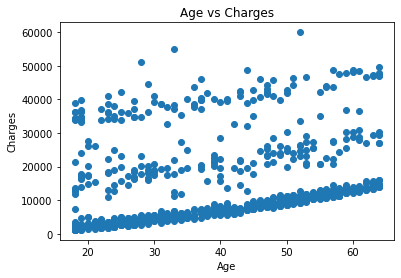

In [143]:
plt.plot(df_train['age'], df_train['charges'], 'o')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

Hay tres "franjas" de precios. Dentro de cada franja el precio aumenta con la edad.

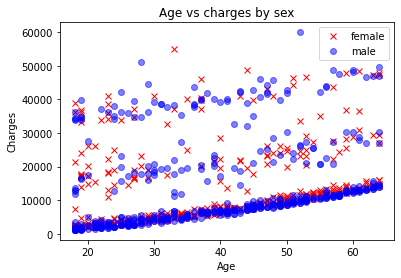

In [144]:
plt.plot(df_train['age'][df_train['sex']==0], df_train['charges'][df_train['sex']==0], 'rx', label='female')
plt.plot(df_train['age'][df_train['sex']==1], df_train['charges'][df_train['sex']==1], 'bo', alpha=0.5, label='male')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs charges by sex')
plt.legend()
plt.show()

En principio el sexo no parecería influir.

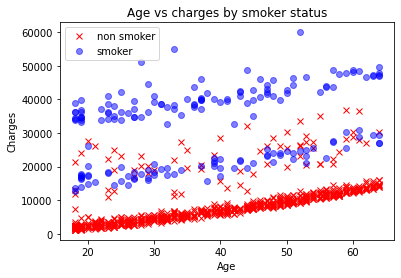

In [145]:
plt.plot(df_train['age'][df_train['smoker']==0], df_train['charges'][df_train['smoker']==0], 'rx', label='non smoker')
plt.plot(df_train['age'][df_train['smoker']==1], df_train['charges'][df_train['smoker']==1], 'bo', alpha=0.5, label='smoker')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs charges by smoker status')
plt.legend()
plt.show()

Las personas que fuman (azul) no están en la primera franja (menor precio), solo en las dos más caras.

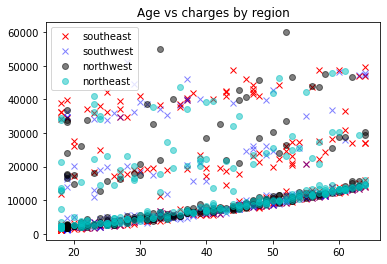

In [146]:
plt.plot(df_train['age'][df_train['region']==0], df_train['charges'][df_train['region']==0], 'rx', label='southeast')
plt.plot(df_train['age'][df_train['region']==1], df_train['charges'][df_train['region']==1], 'bx', alpha=0.5, label='southwest')
plt.plot(df_train['age'][df_train['region']==2], df_train['charges'][df_train['region']==2], 'ko', alpha=0.5, label='northwest')
plt.plot(df_train['age'][df_train['region']==3], df_train['charges'][df_train['region']==3], 'co', alpha=0.5, label='northeast')
plt.title('Age vs charges by region')
plt.legend()
plt.show()

La región no parecería influir en el precio.

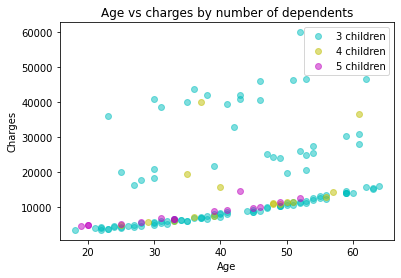

In [147]:
#plt.plot(df['age'][df['children']==0], df['charges'][df['children']==0], 'rx')
#plt.plot(df['age'][df['children']==1], df['charges'][df['children']==1], 'bx', alpha=0.5)
#plt.plot(df['age'][df['children']==2], df['charges'][df['children']==2], 'kx', alpha=0.5)
plt.plot(df_train['age'][df_train['children']==3], df_train['charges'][df_train['children']==3], 'co', alpha=0.5, label='3 children')
plt.plot(df_train['age'][df_train['children']==4], df_train['charges'][df_train['children']==4], 'yo', alpha=0.5, label = '4 children')
plt.plot(df_train['age'][df_train['children']==5], df_train['charges'][df_train['children']==5], 'mo', alpha=0.5, label = '5 children')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs charges by number of dependents')
plt.legend()
plt.show()

Las personas con 5 niños están en general en la primera franja.
Las personas con 4 niños están en general en la primera o segunda franja.

(Menor costo individual por varias personas aseguradas)

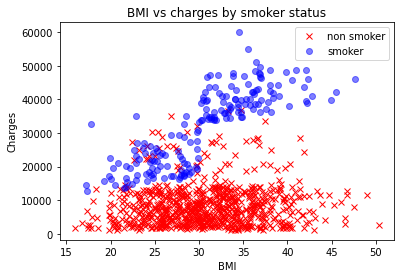

In [148]:
plt.plot(df_train['bmi'][df_train['smoker']==0], df_train['charges'][df_train['smoker']==0], 'rx', label='non smoker')
plt.plot(df_train['bmi'][df_train['smoker']==1], df_train['charges'][df_train['smoker']==1], 'bo', alpha=0.5, label='smoker')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs charges by smoker status')
plt.legend()
plt.show()

Los fumadores con BMI mayor a 30 (aproximadamente) tienen precios más altos que los fumadores con menor BMI.

**Análisis de correlación de las variables**

In [149]:
X_train.corr().style.background_gradient(cmap="Blues")

,age,sex,bmi,children,smoker,region
age,1.000000,-0.032697,0.091275,0.044613,-0.050736,-0.009451
sex,-0.032697,1.000000,0.038143,0.038919,0.076744,-0.025217
bmi,0.091275,0.038143,1.000000,0.009979,-0.003277,-0.270704
children,0.044613,0.038919,0.009979,1.000000,0.006098,-0.032131
smoker,-0.050736,0.076744,-0.003277,0.006098,1.000000,-0.068023
region,-0.009451,-0.025217,-0.270704,-0.032131,-0.068023,1.000000


La correlación entre las variables es baja.

**Construcción y evaluación del modelo**

In [150]:
print(X_train.shape, y_train.shape)
print(X_test_aux.shape, y_test.shape)

(936, 6) (936,)
(402, 6) (201,)


In [163]:
X_val, X_test, y_val, y_test = train_test_split(X_test_aux, y_test_aux, test_size=0.5, random_state=11)

In [164]:
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(201, 6) (201,)
(201, 6) (201,)


In [165]:
lin_reg = LinearRegression()

In [166]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [167]:
y_train_pred = lin_reg.predict(X_train)
y_val_pred = lin_reg.predict(X_val)
y_test_pred = lin_reg.predict(X_test)

In [168]:
RMSE_train = mean_squared_error(y_train, y_train_pred, squared=False)
print(F'RMSE train: {round(RMSE_train)}')

RMSE train: 5878


In [169]:
RMSE_val = mean_squared_error(y_val, y_val_pred, squared=False)
print(F'RMSE val: {round(RMSE_val)}')

RMSE val: 6433


In [170]:
RMSE_test = mean_squared_error(y_test, y_test_pred, squared=False)
print(F'RMSE test: {round(RMSE_test)}')

RMSE test: 6438


In [ ]:
"""Step 4:

Hypertune your model to improve your results.

Use the app.py to create your final machine learning modeling pipeline.

Save your final model in the 'models' folder.

In your README file write a brief summary."""